In [6]:
import base64
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import base64
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import EnglishStemmer
import string
import re
# Plotly imports
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

# Other imports
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import string
# Plotly imports
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

# Other imports
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
df = pd.read_csv(r"C:\Users\wangtao\Desktop\whole_data600.csv")
df.shape

(224, 3)

In [5]:
z = {'JJ': 'James Joyece', 'RY': 'Richard Yates', 'RC': 'Remond Carvert'}
data = [go.Bar(
            x = df.author.map(z).unique(),
            y = df.author.value_counts().values,
            marker= dict(colorscale='Jet',
                         color = df.author.value_counts().values
                        ),
            text='Text entries attributed to Author'
    )]

layout = go.Layout(
    title='Target variable distribution'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

# Feature Enginerring  for the whole data

In [9]:
import re

eng_stopwords = set(stopwords.words("english"))
stemmer = EnglishStemmer()
pd.options.mode.chained_assignment = None

##Using NLTK to extract unique words unisng the feauture engeering re.sub 
##to replace anything that not a word  stopwords are not included 
df['split'] = df['text'].apply(nltk.word_tokenize)
df['words'] = df['split'].apply(lambda x : [word.lower() for word in x if word.isalpha()])
                                          # not enough the punctuation is not removed just using NLTK tokenizer 
                                          #using the judgement word.isalpha to make sure it is a word

df['stemmed'] = df['words'].apply(lambda x: [stemmer.stem(y) for y in x 
                                                         if re.sub('[^a-z]+','',y.lower()) not in eng_stopwords])
## Number of unique words in the text ##

df["num_unique_words"] = df['stemmed'].apply(lambda x: len(x))

## Number of stopwords in the text ##
df["num_stopwords"] = df['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))


In [10]:

#df = df.drop(columns=['Unnamed: 0'])
df.head() #查看

,number,author,text,split,words,stemmed,num_unique_words,num_stopwords
0,0,JJ,THERE was no hope for him this time: it was th...,"[THERE, was, no, hope, for, him, this, time, :...","[there, was, no, hope, for, him, this, time, i...","[hope, time, third, stroke, night, night, pass...",273,299
1,1,JJ,on the table. But why do you think it's not go...,"[on, the, table, ., But, why, do, you, think, ...","[on, the, table, but, why, do, you, think, it,...","[tabl, think, good, children, ask, bad, childr...",279,304
2,2,JJ,Napoleon Bonaparte and he hadexplained to me t...,"[Napoleon, Bonaparte, and, he, hadexplained, t...","[napoleon, bonaparte, and, he, hadexplained, t...","[napoleon, bonapart, hadexplain, mean, differ,...",281,312
3,3,JJ,a chalice. His facewas very truculent grey and...,"[a, chalice, ., His, facewas, very, truculent,...","[a, chalice, his, facewas, very, truculent, gr...","[chalic, facewa, trucul, grey, massiv, black, ...",273,297
4,4,JJ,any me nor you ma'am sending him his snuff. Ah...,"[any, me, nor, you, ma'am, sending, him, his, ...","[any, me, nor, you, sending, him, his, snuff, ...","[send, snuff, ah, poor, jame, stop, commune, p...",259,315


## Visualize the result

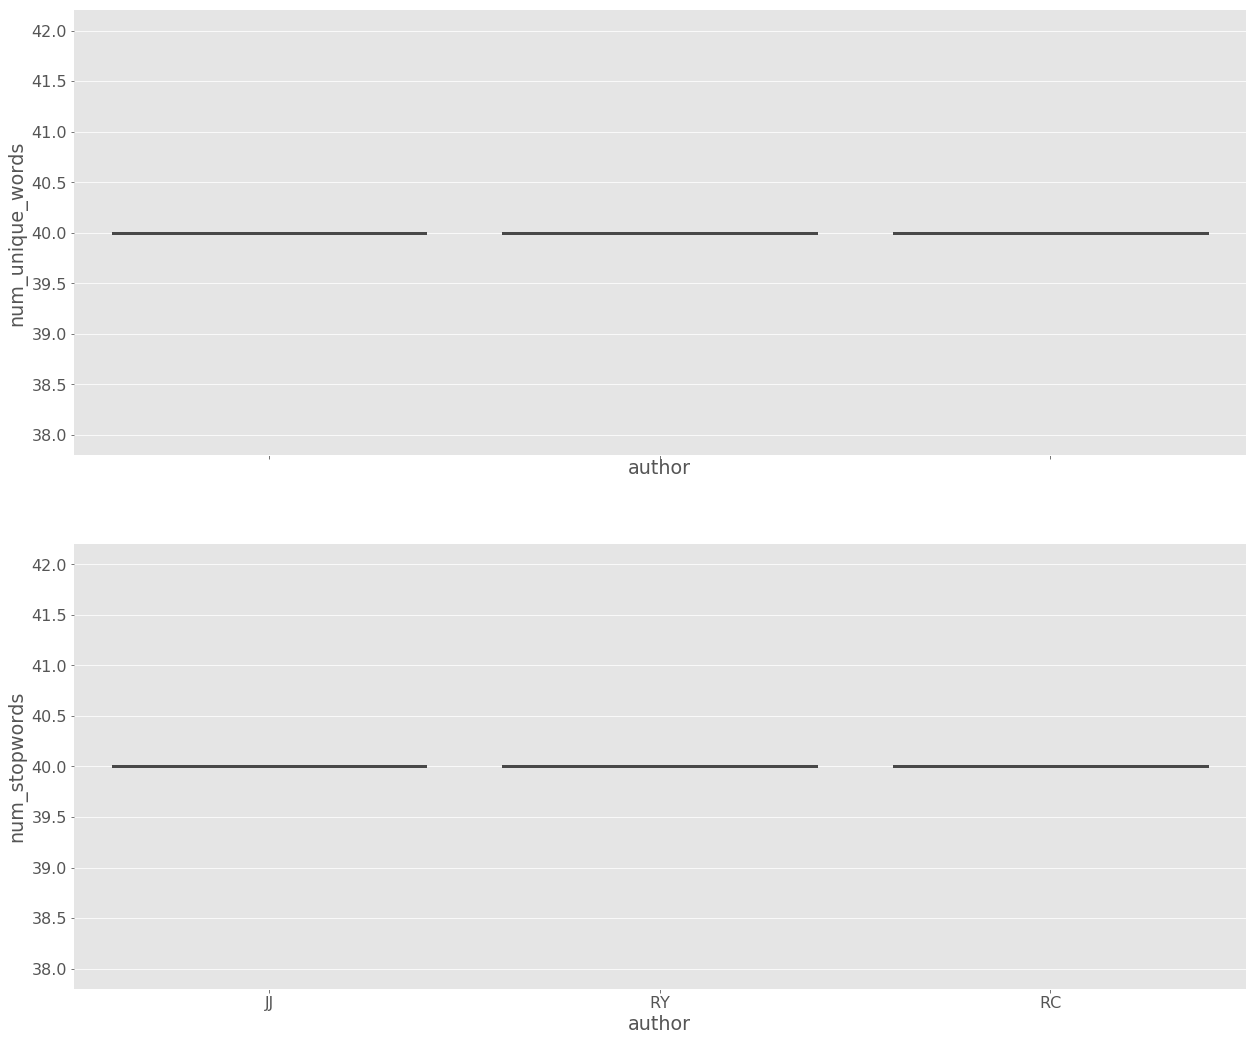

In [11]:
f, axes = plt.subplots(2,1,figsize=(21, 18), sharex=True, sharey = False)  #ploty visualization
sns.despine(left=True)
sns.set_context("poster")

df['num_unique_words'].loc[df['num_unique_words'] >40] = 40  #truncation for better visuals
sns.violinplot(x='author', y='num_unique_words', data=df, ax = axes[0])


df['num_stopwords'].loc[df['num_stopwords'] >40] = 40 #truncation for better visuals
sns.violinplot(x='author', y='num_stopwords', data=df, ax  = axes[1])

sns.despine(left=True)

In [12]:
def fraction_noun(x):
    """function to give us fraction of noun over total words """
    text_splited = str(x).split()
    text_splited = [''.join(c for c in s if c not in string.punctuation) for s in text_splited]
    text_splited = [s for s in text_splited if s]
    word_count = len(text_splited)
    pos_list = nltk.pos_tag(text_splited)
    noun_count = len([w for w in pos_list if w[1] in ('NN','NNP','NNPS','NNS')])
    return (noun_count/word_count)

def fraction_adj(x):
    """function to give us fraction of adjectives over total words in given text"""
    text_splited = str(x).split()
    text_splited = [''.join(c for c in s if c not in string.punctuation) for s in text_splited]
    text_splited = [s for s in text_splited if s]
    word_count = len(text_splited)
    pos_list = nltk.pos_tag(text_splited)
    adj_count = len([w for w in pos_list if w[1] in ('JJ','JJR','JJS')])
    return (adj_count/word_count)

def fraction_verb(x):
    """function to give us fraction of verbs over total words in given text"""
    text_splited = str(x).split()
    text_splited = [''.join(c for c in s if c not in string.punctuation)for s in text_splited]
    text_splited = [s for s in text_splited if s]
    word_count = len(text_splited)
    pos_list = nltk.pos_tag(text_splited)
    verb_count = len( [w for w in pos_list if w[1] in ('VB','VBD','VBG','VBN','VBP','VBZ') ])
    return(verb_count/word_count)

def fraction_adv(x):
    text_splited = str(x).split()
    text_splited = [''.join(c for c in s if c not in string.punctuation)for s in text_splited]
    text_splited = [s for s in text_splited if s]
    word_count = len(text_splited)
    pos_list  = nltk.pos_tag(text_splited)
    adv_count = len([w for w in pos_list if w[1] in ('RB','RBR','RBS')])
    return(adv_count/word_count)

In [13]:
df['fraction_noun'] = df['text'].apply(lambda x:fraction_noun(x))
df['fraction_adj'] = df['text'].apply(lambda x:fraction_adj(x))
df['fraction_verb'] = df['text'].apply(lambda x:fraction_verb(x))
df['fraction_adv'] = df['text'].apply(lambda x: fraction_adv(x))

In [14]:
##the average fration of noun
print('Average fraction of noun of JJ: ',df['fraction_noun'].loc[df['author']=='JJ'].mean())
print('Average fraction of noun of RY: ',df['fraction_noun'].loc[df['author']=='RY'].mean())
print('Average fraction of noun of RC: ',df['fraction_noun'].loc[df['author']=='RC'].mean(),'\n')
## the average fration of adjective
print('Average fraction of adjective of JJ: ',df['fraction_adj'].loc[df['author']=='JJ'].mean())
print('Average fraction of adjective of RY: ',df['fraction_adj'].loc[df['author']=='RY'].mean())
print('Average fraction of adjective of RC: ',df['fraction_adj'].loc[df['author']=='RC'].mean(),'\n')
##the average fraction of verb
print('Average fraction of verb of JJ: ',df['fraction_verb'].loc[df['author']=='JJ'].mean())
print('Average fraction of verb of RY: ',df['fraction_verb'].loc[df['author']=='RY'].mean())
print('Average fraction of verb of RC: ',df['fraction_verb'].loc[df['author']=='RC'].mean(),'\n')
##the average fraction of adverb
print('Average fraction of adverb of JJ: ',df['fraction_adv'].loc[df['author']=='JJ'].mean())
print('Average fraction of adverb of RY: ',df['fraction_adv'].loc[df['author']=='RY'].mean())
print('Average fraction of adverb of RC: ',df['fraction_adv'].loc[df['author']=='RC'].mean())

Average fraction of noun of JJ:  0.25955366897627385
Average fraction of noun of RY:  0.2410677319129729
Average fraction of noun of RC:  0.23489160784172405 

Average fraction of adjective of JJ:  0.06259012981023131
Average fraction of adjective of RY:  0.06450037298938273
Average fraction of adjective of RC:  0.04310757722957404 

Average fraction of verb of JJ:  0.19481202119363242
Average fraction of verb of RY:  0.19127114870798473
Average fraction of verb of RC:  0.22169705750928081 

Average fraction of adverb of JJ:  0.052373569165498554
Average fraction of adverb of RY:  0.060251000997142104
Average fraction of adverb of RC:  0.05071981984771416


## Count word again and see the distribution of each author in the top 50 popular words 

In [15]:
# Count words overall and by author
word_count = {'ALL': pd.Series([y for x in df['stemmed'] for y in x]).value_counts()} #make a dictionary of all data
authors = ['JJ','RY','RC']
# enumerate() function  count the number of authors in each word by using auth:i dictionary
authors_dict = {auth: i for i, auth in enumerate(authors)} 

for auth in authors:
    word_count[auth] = pd.Series([y for x in df.loc[df['author']==auth, 'stemmed']
                                  for y in x]).value_counts()
word_count = pd.DataFrame(word_count).fillna(0).astype(int).sort_values('ALL', ascending=False)[['ALL']+authors]

print(word_count[authors[:3]])

print('Count for the most common words (excl. stopwords)')

                        JJ   RY   RC
said                   614  418  444
one                    177  211   90
would                  175  213   38
look                    92  199  126
go                     105  146  159
like                   113  186   77
say                     90  119  149
could                  101  183   62
know                    91  145  107
time                    95  186   53
man                    176   77   69
back                    67  128  120
littl                  115  148   43
hand                    91  123   63
thing                   37  154   82
right                   65  141   60
get                     50  129   83
got                     33  131   81
well                    95  124   24
see                     73  105   58
come                    80   90   64
think                   64  109   56
old                    119   55   42
good                    78   96   36
way                     49  130   28
turn                    67   86   51
a

## Visualize the distribution 

(-0.7, 49.7)

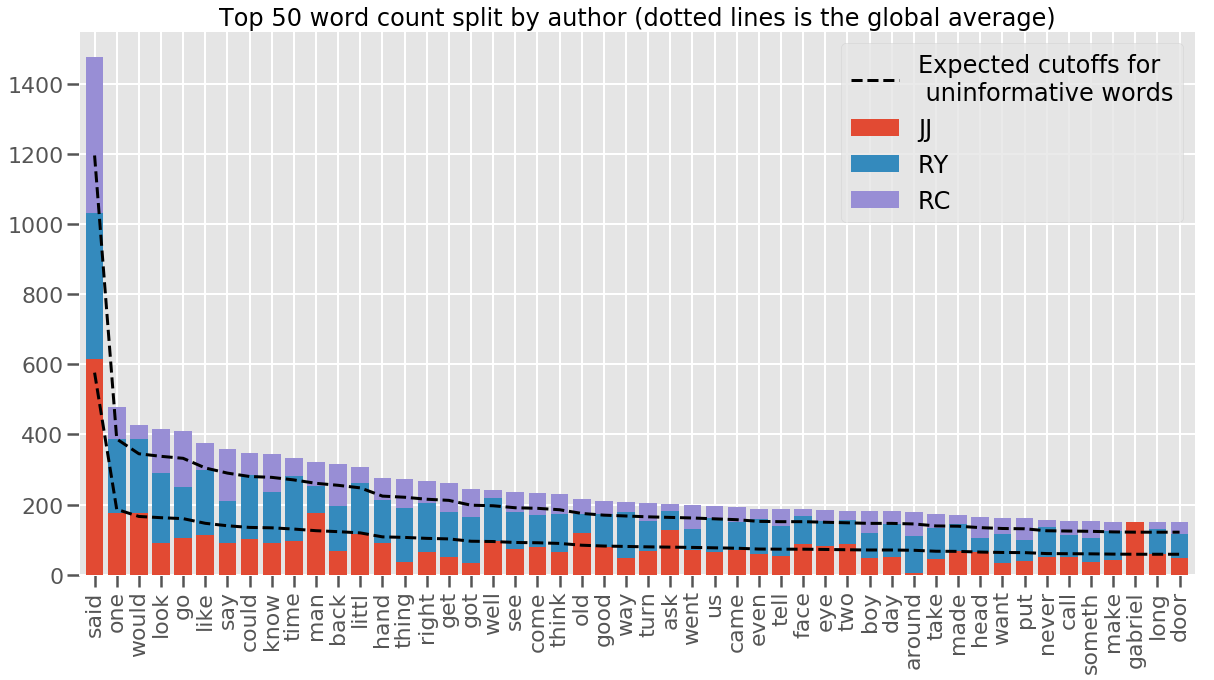

In [16]:
plt.style.use('ggplot')
plt.rcParams['font.size'] = 16
plt.figure(figsize=(20,10))
bottom = np.zeros((50))
ind = np.arange(50)
df = word_count.head(50)
for auth in authors:
    # Stacked bar with actual numbers.
    # Uncomment the below for percentages instead.
    vals = df[auth]# / df['ALL']
    plt.bar(ind, vals, bottom=bottom, label = auth)
    bottom += vals

# If using percentages, replace the two "df['ALL']" by "np.ones(df['ALL'].shape)"
plt.plot(ind, df['ALL'] * word_count[authors[0]].values.sum() / word_count['ALL'].sum(), 'k--',
         label='Expected cutoffs for\n uninformative words')
plt.plot(ind, df['ALL'] * word_count[authors[:2]].values.sum() / word_count['ALL'].sum(), 'k--', label='')
plt.xticks(ind, df.index, rotation='vertical')
#plt.yticks(np.arange(0,1.1,0.2), ['{:.0%}'.format(x) for x in np.arange(0,1.1,0.2)])
plt.legend(fontsize=24)
plt.title('Top 50 word count split by author (dotted lines is the global average)', fontsize=24)
plt.xlim([-0.7,49.7])## 设置坐标轴取值范围